## Assignment 2 - Erica Di Pede - 1004030336

# 1.0 Criminal Investigation

#### 1.2

In [203]:
import pandas as pd
import numpy as np
import datetime
df = pd.read_excel('phone_data.xls')
df.head()

,Date,Start time,From city,To city,Number called (to/from),Call type,Duration,Grand Total
0,10-14-2019,12:53:34 PM,INCOMING ON,TORONTO ON,Unknown caller,Incoming,1,0
1,10-13-2019,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7,0
2,10-13-2019,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
3,10-13-2019,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
4,10-11-2019,07:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37,0


#### 1.2.1

In [204]:
options = ['Outgoing'] 
df_outgoing = df[df['Call type'].isin(options)] #dataframe to only include outgoing calls 
mostcounts_df = df_outgoing['Number called (to/from)'].value_counts()#count number of times certain numbers in specified column appear in df 
mostcounts_df[:3].rename_axis('Number Suspect Called').reset_index(name='Number of Times Suspect Called') #new column titles and take top 3 highest count values 

,Number Suspect Called,Number of Times Suspect Called
0,A_1,111
1,A_5,48
2,B_3,28


#### 1.2.2

In [205]:
options = ['Outgoing'] 
df_outgoing = df[df['Call type'].isin(options)] #dataframe to only include outgoing calls 
mostcounts_df = df_outgoing['Number called (to/from)'].value_counts()#count number of times certain numbers in specified column appear in df 
a = mostcounts_df.rename_axis('Number Suspect Called').reset_index(name='Number of Times Suspect Called') #keeping this un-indexed to call for part 1.6
b = mostcounts_df[18:33].rename_axis('Number Suspect Called').reset_index(name='Number of Times Suspect Called')#table with the least counts of outgoing calls (1) #### with loc function
b

,Number Suspect Called,Number of Times Suspect Called
0,G_2,1
1,F_5,1
2,D_2,1
3,F_1,1
4,F_2,1
5,F_4,1
6,D_1,1
7,D_5,1
8,E_5,1
9,C_3,1


#### 1.2.3  Highest and lowest total duration of outgoing calls

In [206]:
# 1.  Identify the 3 numbers with the longest summed duration of outgoing calls 
options = ['Outgoing'] 
df_outgoing = df[df['Call type'].isin(options)] #sort original dataframe by removing all incoming calls 
dff = df_outgoing.groupby(["Number called (to/from)"]).Duration.sum().reset_index() #groupoing only number called & summed duration columns 
c = dff.sort_values(by='Duration', ascending=False) #sorting values in decreasing order of summed call duration 
c[0:3] #want the top 3 numbers 

,Number called (to/from),Duration
0,A_1,1146
4,A_5,427
3,A_4,96


In [240]:
# 2.  Identify the 3 numbers with the shortest summed duration of outgoing calls 
ptions = ['Outgoing'] 
df_outgoing = df[df['Call type'].isin(options)] #sort original dataframe by removing all incoming calls 
dff = df_outgoing.groupby(["Number called (to/from)"]).Duration.sum().reset_index() 
c = dff.sort_values(by='Duration') #acending order 
c[:4] 

,Number called (to/from),Duration
24,E_5,1
23,E_4,1
19,D_5,1
10,C_1,1


#### 1.2.4 Location of outgoing calls

In [241]:
options = ['Outgoing'] 
df_outgoing = df[df['Call type'].isin(options)] #dataframe to only include outgoing calls 
mostcounts_df = df_outgoing['From city'].value_counts()#count number of times certain numbers in specified column appear in df 
mostcounts_df.rename_axis('Location of outgoing call (FROM CITY)').reset_index(name='Count/location of outgoing call')

,Location of outgoing call (FROM CITY),Count/location of outgoing call
0,TORONTO ON,244
1,NEWMARKET ON,2
2,CLAREMONT ON,1


In [242]:
options = ['Outgoing'] 
df_outgoing = df[df['Call type'].isin(options)] #dataframe to only include outgoing calls 
mostcounts_df = df_outgoing['To city'].value_counts()#count number of times certain numbers in specified column appear in df 
mostcounts_df.rename_axis('Location of outgoing call(TO CITY)').reset_index(name='Count/location of outgoing call') 

,Location of outgoing call(TO CITY),Count/location of outgoing call
0,TORONTO ON,199
1,OAK RIDGES ON,28
2,RICHMONDHL ON,10
3,THORNHILL ON,3
4,800 SERV SERV 800 ON,1
5,NEWMARKET ON,1
6,877 SERV SERV 877 ON,1
7,STOUFFVL ON,1
8,888 SERV SERV 888 ON,1
9,866 SERV SERV 866 ON,1


#### The places that the calls went to vary more than where they were called from, i think the police may care about the origin of the call more because that will help narrow down where they can find the suspect 

#### 1.2.5 Incoming and Outgoing calls pattern

In [243]:
# 1.  Calculate thetotal durationof incoming and outgoing calls per month.

df = pd.read_excel('phone_data.xls')
df.style.format({"DOB": lambda t: t.strftime("%m-%d-%Y")}) #seperate datetime (month/day/year) into just a column of months
df['month'] = pd.to_datetime(df['Date']).dt.month #add month column of 'months' to original dataframe
pt_totalduration = df.pivot_table(values = 'Duration',index = 'month', columns='Call type',aggfunc='sum') #create table with specified values 

pt_totalduration

Call type,Incoming,Outgoing
month,,
7,84,190
8,54,281
9,244,714
10,63,621
11,87,196


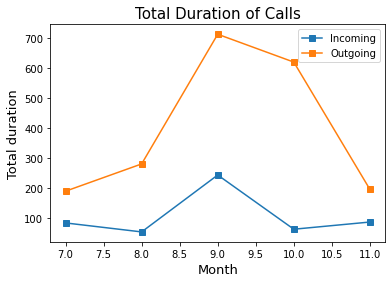

In [244]:
# 2.  Plot the results in one graph for both incoming and outgoing calls. 
import matplotlib.pyplot as plt 

plt.plot(pt_totalduration.index, pt_totalduration , '-s') #plot with square '-s'
plt.title('Total Duration of Calls', fontsize=15)
plt.xlabel('Month', fontsize=13)
plt.ylabel('Total duration', fontsize=13)
plt.legend(pt_totalduration.columns, ncol=1)
plt.show()

#### 3.  Do you see anything unusual in the pattern?  E.g.  does this look like a phone line thatwas used for criminal activities or more like a personal phone?

There are many more outgoing calls than incoming calls, if this was a personal phone i feel as though there would be a more even ratio of incoming to outgoing as people would call back more often. A phone used for criminal activites would fit this data 
because possibly the criminal is calling to organize crimes/deliver orders and there is no need for the person to call back (either because they just needed to complete the job and disappear OR they didn't want to call back in fear of their number being traced).

There is a spike of calls at the 9th month (september) which is odd, usually you would see a more even number of calls throughout the month. This would fit criminal activity because possibly if there was a crime to be planned in october the 
criminal would need to figure out his plans all throughout september hence the spike in calls. 

#### 1.6 Distribution of calls

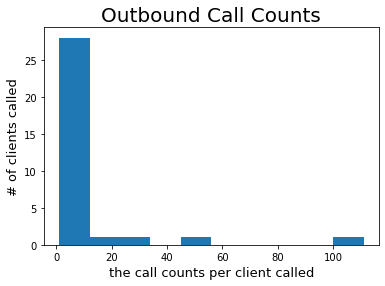

In [212]:
import matplotlib.pyplot as plt
a['Number of Times Suspect Called'].plot(kind='hist')
plt.title('Outbound Call Counts', fontsize=20)
plt.xlabel('the call counts per client called', fontsize=13)
plt.ylabel('# of clients called', fontsize=13)
plt.show()

# 2.0 The ergodicity problem in economics

#### 2.3.1 Coding the Problem

In [252]:
import numpy as np
import pandas as pd

N,w = 100,100
Simulation_fcn= pd.DataFrame(np.random.rand(N,w)) #building a dataframe of random numbers with 100 rows & 100 columns 
Simulation_fcn = Simulation_fcn.add_prefix('prob'+ "_") # adding title to the column name 

Simulation_fcn 

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,prob_90,prob_91,prob_92,prob_93,prob_94,prob_95,prob_96,prob_97,prob_98,prob_99
0,0.062473,0.433036,0.688006,0.749377,0.237254,0.305166,0.854921,0.060917,0.778171,0.549923,...,0.755274,0.723374,0.751971,0.387723,0.187103,0.648273,0.585929,0.289253,0.859308,0.335545
1,0.184469,0.545956,0.451626,0.450075,0.024456,0.049347,0.847424,0.000954,0.199606,0.157548,...,0.791290,0.631310,0.487668,0.760917,0.422197,0.860969,0.373189,0.171077,0.945091,0.647672
2,0.659793,0.459690,0.177658,0.203729,0.456788,0.612915,0.929561,0.089614,0.338674,0.856172,...,0.337512,0.819931,0.493254,0.195074,0.761190,0.724120,0.449496,0.471074,0.947427,0.334231
3,0.519898,0.544910,0.283029,0.966571,0.736762,0.750757,0.081095,0.329508,0.268559,0.535771,...,0.029475,0.004748,0.770782,0.044906,0.143043,0.631488,0.370398,0.171365,0.798657,0.951529
4,0.091486,0.781312,0.707816,0.986015,0.308719,0.631509,0.721427,0.596269,0.535001,0.319021,...,0.885788,0.070692,0.560600,0.521186,0.741554,0.115283,0.375484,0.725973,0.615973,0.227402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.371081,0.697307,0.280560,0.163119,0.115233,0.282379,0.698716,0.552787,0.682126,0.177311,...,0.908015,0.530137,0.598088,0.787433,0.339868,0.222396,0.937232,0.702217,0.867471,0.299352
96,0.404188,0.093251,0.571540,0.376978,0.839354,0.191972,0.799311,0.416175,0.965802,0.769394,...,0.843296,0.818458,0.689485,0.325278,0.948231,0.584484,0.930204,0.721456,0.593983,0.460373
97,0.142006,0.084006,0.798855,0.549689,0.573726,0.336290,0.083839,0.483977,0.867744,0.259365,...,0.492856,0.207077,0.994295,0.709913,0.753961,0.487899,0.725658,0.426123,0.889365,0.458983
98,0.271877,0.198797,0.854558,0.895887,0.432767,0.763661,0.702804,0.383694,0.987624,0.824073,...,0.475925,0.081000,0.837245,0.047154,0.349905,0.181040,0.913045,0.337158,0.962786,0.212551


#### 2.3.2 

In [257]:
df = 100 * pd.DataFrame(np.ones(shape=(N,w)))
df = df.add_prefix('balance_')
Simulation_fcn_ = pd.concat([Simulation_fcn,df],axis=1)
Simulation_fcn_ 

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,0.062473,0.433036,0.688006,0.749377,0.237254,0.305166,0.854921,0.060917,0.778171,0.549923,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,0.184469,0.545956,0.451626,0.450075,0.024456,0.049347,0.847424,0.000954,0.199606,0.157548,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,0.659793,0.459690,0.177658,0.203729,0.456788,0.612915,0.929561,0.089614,0.338674,0.856172,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,0.519898,0.544910,0.283029,0.966571,0.736762,0.750757,0.081095,0.329508,0.268559,0.535771,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,0.091486,0.781312,0.707816,0.986015,0.308719,0.631509,0.721427,0.596269,0.535001,0.319021,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.371081,0.697307,0.280560,0.163119,0.115233,0.282379,0.698716,0.552787,0.682126,0.177311,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
96,0.404188,0.093251,0.571540,0.376978,0.839354,0.191972,0.799311,0.416175,0.965802,0.769394,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
97,0.142006,0.084006,0.798855,0.549689,0.573726,0.336290,0.083839,0.483977,0.867744,0.259365,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
98,0.271877,0.198797,0.854558,0.895887,0.432767,0.763661,0.702804,0.383694,0.987624,0.824073,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


#### 2.3.3

In [255]:
for i in range(0,N-1):  
    for j in np.arange(w,2*w): 
        if Simulation_fcn.iloc[i,j-w] >= 0.5:   
            Simulation_fcn.iloc[i+1,j] = 1.5 * Simulation_fcn.iloc[i,j]  
        else:
            Simulation_fcn.iloc[i+1,j] = 0.6 * Simulation_fcn.iloc[i,j] 
Simulation_fcn.head()            

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,Balance_90,Balance_91,Balance_92,Balance_93,Balance_94,Balance_95,Balance_96,Balance_97,Balance_98,Balance_99
0,0.062473,0.433036,0.688006,0.749377,0.237254,0.305166,0.854921,0.060917,0.778171,0.549923,...,100.0,100.0,100.0,100.0,100.0,100.00,100.0,100.00,100.00,100.0
1,0.184469,0.545956,0.451626,0.450075,0.024456,0.049347,0.847424,0.000954,0.199606,0.157548,...,150.0,150.0,150.0,60.0,60.0,150.00,150.0,60.00,150.00,60.0
2,0.659793,0.459690,0.177658,0.203729,0.456788,0.612915,0.929561,0.089614,0.338674,0.856172,...,225.0,225.0,90.0,90.0,36.0,225.00,90.0,36.00,225.00,90.0
3,0.519898,0.544910,0.283029,0.966571,0.736762,0.750757,0.081095,0.329508,0.268559,0.535771,...,135.0,337.5,54.0,54.0,54.0,337.50,54.0,21.60,337.50,54.0
4,0.091486,0.781312,0.707816,0.986015,0.308719,0.631509,0.721427,0.596269,0.535001,0.319021,...,81.0,202.5,81.0,32.4,32.4,506.25,32.4,12.96,506.25,81.0


In [258]:
Simulation_fcn_balance = Simulation_fcn.iloc[:,100:200] #this shows the data of only the balance of the gamblers 
Simulation_fcn_balance.head()

,Balance_0,Balance_1,Balance_2,Balance_3,Balance_4,Balance_5,Balance_6,Balance_7,Balance_8,Balance_9,...,Balance_90,Balance_91,Balance_92,Balance_93,Balance_94,Balance_95,Balance_96,Balance_97,Balance_98,Balance_99
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.00,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.00,100.0,100.00,100.00,100.0
1,60.0,60.0,150.0,150.0,60.0,60.0,150.0,60.00,150.0,150.0,...,150.0,150.0,150.0,60.0,60.0,150.00,150.0,60.00,150.00,60.0
2,36.0,90.0,90.0,90.0,36.0,36.0,225.0,36.00,90.0,90.0,...,225.0,225.0,90.0,90.0,36.0,225.00,90.0,36.00,225.00,90.0
3,54.0,54.0,54.0,54.0,21.6,54.0,337.5,21.60,54.0,135.0,...,135.0,337.5,54.0,54.0,54.0,337.50,54.0,21.60,337.50,54.0
4,81.0,81.0,32.4,81.0,32.4,81.0,202.5,12.96,32.4,202.5,...,81.0,202.5,81.0,32.4,32.4,506.25,32.4,12.96,506.25,81.0


#### 2.3.4

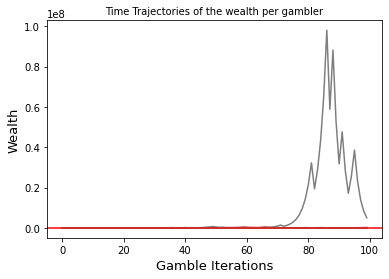

In [259]:
#plotting time trajectories of the wealth per gambler

import matplotlib.pyplot as plt
plt.plot(Simulation_fcn_balance.index, Simulation_fcn_balance) #plotting gamble interations per gambler (gambler # is represented by index value)
plt.axhline(y=100, color='r', linestyle='-')
plt.title('Time Trajectories of the wealth per gambler', fontsize=10)
plt.xlabel('Gamble Iterations', fontsize=13)
plt.ylabel('Wealth', fontsize=13)
plt.show()

In [261]:
#looking through all index's to count how many of the column sum's are over 100
print('Number of gamblers that have more than their original 100',":",(Simulation_fcn_balance.iloc[99] > 100).sum())

Number of gamblers that have more than their original 100 : 15


In [219]:
# Increasing N to 1,000 (Figure 2 in the original paper, except the red and blue line)? 

In [276]:
N,w = 1000,100
Simulation_fcn= pd.DataFrame(np.random.rand(N,w)) #building a dataframe of random numbers with 1000 rows & 100 columns 
Simulation_fcn = Simulation_fcn.add_prefix('prob'+ "_") # adding title to the column name 

fill = 100 * pd.DataFrame(np.ones(shape=(N,w))) #filling a dataframe with 1's then 100
fill = fill.add_prefix('balance_') #adding column name
Simulation_fcn = pd.concat([Simulation_fcn,fill],axis=1) #combine both columns 
Simulation_fcn 

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,0.638451,0.989538,0.644330,0.122534,0.485108,0.283550,0.976706,0.927849,0.378542,0.435519,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,0.660949,0.783202,0.584016,0.228644,0.778098,0.260894,0.647151,0.065332,0.405420,0.098705,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,0.509047,0.499549,0.733337,0.585494,0.721969,0.511921,0.473985,0.883476,0.297921,0.484946,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,0.150370,0.129330,0.561611,0.990139,0.027885,0.390304,0.576508,0.916257,0.796604,0.881822,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,0.477387,0.230071,0.354375,0.643066,0.081118,0.366752,0.280690,0.680362,0.064594,0.062636,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000291,0.970544,0.106960,0.393040,0.312012,0.201400,0.841436,0.802999,0.889303,0.348987,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
996,0.387203,0.936219,0.101460,0.341428,0.912388,0.301150,0.068998,0.117735,0.348870,0.258692,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
997,0.194844,0.308041,0.015811,0.795628,0.728933,0.062216,0.249484,0.310256,0.368999,0.770110,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
998,0.329053,0.290226,0.410472,0.780782,0.755914,0.703863,0.767453,0.143009,0.588975,0.708918,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [277]:
for i in range(0,N-1):  
    for j in np.arange(w,2*w): 
        if Simulation_fcn.iloc[i,j-w] >= 0.5:   
            Simulation_fcn.iloc[i+1,j] = 1.5 * Simulation_fcn.iloc[i,j]  
        else:
            Simulation_fcn.iloc[i+1,j] = 0.6 * Simulation_fcn.iloc[i,j] 

Simulation_fcn_LARGE =Simulation_fcn.iloc[:,100:200]
Simulation_fcn_LARGE

,balance_0,balance_1,balance_2,balance_3,balance_4,balance_5,balance_6,balance_7,balance_8,balance_9,...,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
1,1.500000e+02,1.500000e+02,1.500000e+02,6.000000e+01,6.000000e+01,6.000000e+01,1.500000e+02,1.500000e+02,6.000000e+01,6.000000e+01,...,1.500000e+02,6.000000e+01,1.500000e+02,6.000000e+01,1.500000e+02,6.000000e+01,6.000000e+01,1.500000e+02,1.500000e+02,1.500000e+02
2,2.250000e+02,2.250000e+02,2.250000e+02,3.600000e+01,9.000000e+01,3.600000e+01,2.250000e+02,9.000000e+01,3.600000e+01,3.600000e+01,...,2.250000e+02,3.600000e+01,2.250000e+02,3.600000e+01,9.000000e+01,3.600000e+01,3.600000e+01,2.250000e+02,2.250000e+02,2.250000e+02
3,3.375000e+02,1.350000e+02,3.375000e+02,5.400000e+01,1.350000e+02,5.400000e+01,1.350000e+02,1.350000e+02,2.160000e+01,2.160000e+01,...,1.350000e+02,2.160000e+01,1.350000e+02,5.400000e+01,1.350000e+02,2.160000e+01,2.160000e+01,1.350000e+02,1.350000e+02,3.375000e+02
4,2.025000e+02,8.100000e+01,5.062500e+02,8.100000e+01,8.100000e+01,3.240000e+01,2.025000e+02,2.025000e+02,3.240000e+01,3.240000e+01,...,8.100000e+01,3.240000e+01,8.100000e+01,3.240000e+01,2.025000e+02,1.296000e+01,1.296000e+01,8.100000e+01,8.100000e+01,2.025000e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.594290e-17,1.114239e-23,2.852452e-25,9.664484e-12,2.852452e-25,7.302277e-27,1.869383e-28,7.302277e-27,1.700194e-20,1.960190e-32,...,2.474108e-13,6.485725e-17,2.720310e-21,1.196405e-29,3.136304e-33,2.852452e-25,4.250485e-20,6.185270e-13,3.062797e-31,6.485725e-17
996,1.556574e-17,1.671359e-23,1.711471e-25,5.798690e-12,1.711471e-25,4.381366e-27,2.804075e-28,1.095342e-26,2.550291e-20,1.176114e-32,...,1.484465e-13,9.728588e-17,4.080465e-21,1.794608e-29,4.704456e-33,1.711471e-25,2.550291e-20,9.277904e-13,1.837678e-31,3.891435e-17
997,9.339444e-18,2.507038e-23,1.026883e-25,3.479214e-12,2.567207e-25,2.628820e-27,1.682445e-28,6.572050e-27,1.530175e-20,7.056685e-33,...,8.906788e-14,5.837153e-17,2.448279e-21,1.076765e-29,7.056685e-33,2.567207e-25,1.530175e-20,1.391686e-12,2.756517e-31,2.334861e-17
998,5.603667e-18,1.504223e-23,6.161297e-26,5.218821e-12,3.850810e-25,1.577292e-27,1.009467e-28,3.943230e-27,9.181047e-21,1.058503e-32,...,1.336018e-13,3.502292e-17,3.672419e-21,6.460588e-30,4.234011e-33,3.850810e-25,9.181047e-21,2.087528e-12,4.134776e-31,3.502292e-17


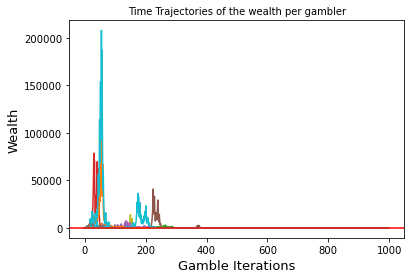

In [278]:
#plotting time trajectories of the wealth per gambler of LARGE (row=1000) dataset

import matplotlib.pyplot as plt
plt.plot(Simulation_fcn_LARGE.index, Simulation_fcn_LARGE) #plotting gamble interations per gambler (gambler # is represented by index value)
plt.axhline(y=100, color='r', linestyle='-')
plt.title('Time Trajectories of the wealth per gambler', fontsize=10)
plt.xlabel('Gamble Iterations', fontsize=13)
plt.ylabel('Wealth', fontsize=13)
plt.show()

In [279]:
print('Number of gamblers that have more than their original 100',":",(Simulation_fcn_LARGE.iloc[999] > 100).sum())

Number of gamblers that have more than their original 100 : 0


In [280]:
# 5. Plot the time trajectories of the mean and median wealth at every time point from 0 to 1,000.  Try both linear and logarithmic scaler for the wealth axis.  What are yourobservations?

simulation_fcn_large_data = pd.DataFrame([Simulation_fcn_LARGE.mean(axis=1), Simulation_fcn_LARGE.median(axis=1)]).transpose()
simulation_fcn_large_data.columns = ['mean','median']
simulation_fcn_large_data

,mean,median
0,1.000000e+02,1.000000e+02
1,1.068000e+02,1.500000e+02
2,1.232100e+02,9.000000e+01
3,1.378350e+02,1.350000e+02
4,1.448847e+02,8.100000e+01
...,...,...
995,2.436704e-11,3.046748e-22
996,1.522354e-11,2.611498e-22
997,9.986906e-12,1.566899e-22
998,7.270838e-12,1.645244e-22


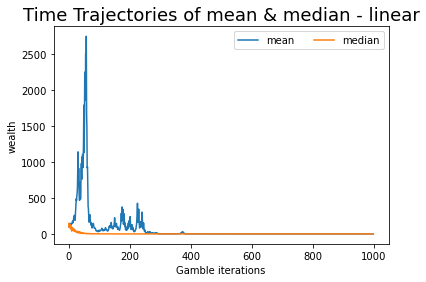

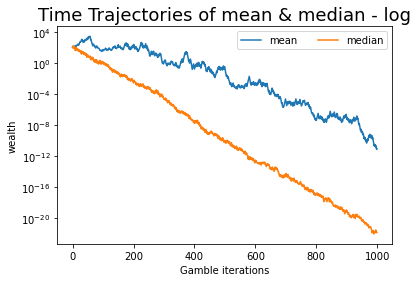

In [282]:
import matplotlib.pyplot as plt

plt.plot(simulation_fcn_large_data.index, simulation_fcn_large_data)
plt.title('Time Trajectories of mean & median - linear', fontsize=18)
plt.xlabel('Gamble iterations', fontsize=10)
plt.ylabel('wealth', fontsize=10) 
plt.yscale('linear')
plt.legend(simulation_fcn_large_data.columns, ncol=3)
plt.show()

plt.plot(simulation_fcn_large_data.index, simulation_fcn_large_data)
plt.title('Time Trajectories of mean & median - log', fontsize=18)
plt.xlabel('Gamble iterations', fontsize=10)
plt.ylabel('wealth', fontsize=10) 
plt.yscale('log')
plt.legend(simulation_fcn_large_data.columns, ncol=3)
plt.show()

As N increases (the number of gamble iterations), both the mean and the median go down. There is a large difference between the mean and the median looking at the linear time trajectory plot before around t = 200 then after that time the median and mean become closer - as seen by the single (overlapped) horionzal line from 400-1000. Unlike the linear plot, in the log plot the mean and meadian are similar initially, then the gap between the two data sets increasess. 

#### 2.3.6

In [268]:
# 6.  Repeat steps 3-5 with N=10 and w=1,000 with the following logic:

N,w = 10,1000
Simulation_fcn= pd.DataFrame(np.random.rand(N,w)) #building a dataframe of random numbers with 1000 rows & 100 columns 
Simulation_fcn = Simulation_fcn.add_prefix('prob'+ "_") # adding title to the column name 

fill = 100 * pd.DataFrame(np.ones(shape=(N,w))) #filling a dataframe with 1's then 100
fill = fill.add_prefix('balance_') #adding column name
Simulation_fcn = pd.concat([Simulation_fcn,fill],axis=1) #combine both columns 
Simulation_fcn

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_990,balance_991,balance_992,balance_993,balance_994,balance_995,balance_996,balance_997,balance_998,balance_999
0,0.290312,0.352829,0.376646,0.355912,0.264874,0.877245,0.180779,0.909600,0.420469,0.115772,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,0.326676,0.573701,0.310025,0.610969,0.465344,0.727149,0.805461,0.218082,0.176572,0.256601,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,0.236948,0.157257,0.212627,0.771027,0.976759,0.503838,0.323266,0.688377,0.013906,0.365891,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,0.718832,0.619738,0.585594,0.344051,0.188703,0.066684,0.503631,0.880403,0.344987,0.209091,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,0.935347,0.259571,0.980568,0.987966,0.218610,0.736911,0.951899,0.861204,0.048105,0.058079,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,0.669313,0.073419,0.354279,0.296867,0.930595,0.807884,0.469057,0.659706,0.685155,0.057406,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
6,0.244502,0.419974,0.701031,0.166678,0.043804,0.776015,0.849101,0.945341,0.991112,0.985676,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
7,0.569201,0.911817,0.945546,0.028292,0.067669,0.001758,0.784985,0.589247,0.242054,0.383138,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
8,0.485008,0.629914,0.817417,0.091268,0.060232,0.823831,0.861575,0.022826,0.335118,0.364015,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
9,0.000196,0.978901,0.078570,0.730118,0.652408,0.901060,0.071304,0.593392,0.871578,0.068941,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [269]:
for i in range(0,N-1):  
    for j in np.arange(w,2*w): 
        if Simulation_fcn.iloc[i,j-w] >= 0.5:   
            Simulation_fcn.iloc[i+1,j] = (Simulation_fcn.iloc[i,j] + 50)
        else:
            Simulation_fcn.iloc[i+1,j] = (Simulation_fcn.iloc[i,j] - 40) 

Simulation_fcn_LARGE =Simulation_fcn.iloc[:,1000:2000]
Simulation_fcn_LARGE

,balance_0,balance_1,balance_2,balance_3,balance_4,balance_5,balance_6,balance_7,balance_8,balance_9,...,balance_990,balance_991,balance_992,balance_993,balance_994,balance_995,balance_996,balance_997,balance_998,balance_999
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,60.0,60.0,60.0,60.0,60.0,150.0,60.0,150.0,60.0,60.0,...,150.0,60.0,150.0,150.0,150.0,150.0,60.0,150.0,150.0,150.0
2,20.0,110.0,20.0,110.0,20.0,200.0,110.0,110.0,20.0,20.0,...,200.0,110.0,200.0,200.0,200.0,110.0,110.0,110.0,110.0,200.0
3,-20.0,70.0,-20.0,160.0,70.0,250.0,70.0,160.0,-20.0,-20.0,...,250.0,70.0,160.0,250.0,160.0,70.0,160.0,70.0,160.0,160.0
4,30.0,120.0,30.0,120.0,30.0,210.0,120.0,210.0,-60.0,-60.0,...,300.0,120.0,210.0,300.0,210.0,120.0,120.0,30.0,120.0,210.0
5,80.0,80.0,80.0,170.0,-10.0,260.0,170.0,260.0,-100.0,-100.0,...,260.0,80.0,170.0,350.0,170.0,170.0,170.0,80.0,80.0,260.0
6,130.0,40.0,40.0,130.0,40.0,310.0,130.0,310.0,-50.0,-140.0,...,220.0,40.0,220.0,310.0,130.0,220.0,220.0,130.0,130.0,310.0
7,90.0,0.0,90.0,90.0,0.0,360.0,180.0,360.0,0.0,-90.0,...,270.0,90.0,270.0,360.0,90.0,270.0,270.0,90.0,180.0,270.0
8,140.0,50.0,140.0,50.0,-40.0,320.0,230.0,410.0,-40.0,-130.0,...,230.0,50.0,320.0,320.0,50.0,320.0,230.0,140.0,140.0,320.0
9,100.0,100.0,190.0,10.0,-80.0,370.0,280.0,370.0,-80.0,-170.0,...,190.0,100.0,370.0,280.0,10.0,370.0,190.0,190.0,190.0,280.0


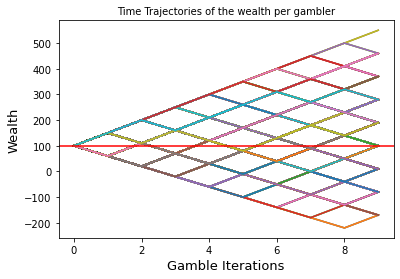

In [270]:
import matplotlib.pyplot as plt

plt.plot(Simulation_fcn_LARGE.index, Simulation_fcn_LARGE) 
plt.axhline(y=100, color='r', linestyle='-')
plt.title('Time Trajectories of the wealth per gambler', fontsize=10)
plt.xlabel('Gamble Iterations', fontsize=13)
plt.ylabel('Wealth', fontsize=13)
plt.show()

In [272]:
print('Number of gamblers that have more than their original 100',":",(Simulation_fcn_LARGE.iloc[9] > 100).sum())

Number of gamblers that have more than their original 100 : 505


In [273]:
simulation_fcn_large_data = pd.DataFrame([Simulation_fcn_LARGE.mean(axis=1), Simulation_fcn_LARGE.median(axis=1)]).transpose()
simulation_fcn_large_data.columns = ['mean','median']
simulation_fcn_large_data

,mean,median
0,100.00,100.0
1,104.82,60.0
2,111.17,110.0
3,116.35,160.0
4,120.18,120.0
5,126.71,170.0
6,130.72,130.0
7,136.71,180.0
8,139.82,140.0
9,144.73,190.0


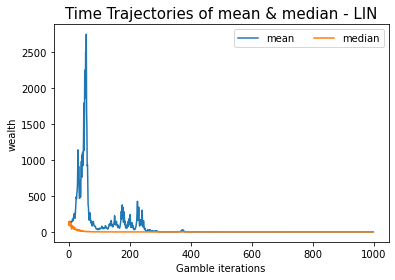

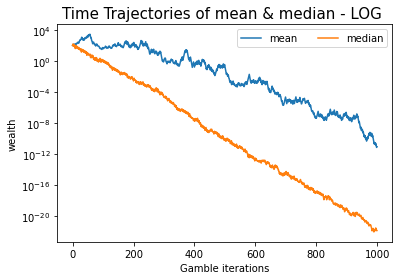

In [283]:
plt.plot(simulation_fcn_large_data.index, simulation_fcn_large_data)
plt.title('Time Trajectories of mean & median - LIN', fontsize=15)
plt.xlabel('Gamble iterations', fontsize=10)
plt.ylabel('wealth', fontsize=10) 
plt.yscale('linear')
plt.legend(simulation_fcn_large_data.columns, ncol=3)
plt.show()

plt.plot(simulation_fcn_large_data.index, simulation_fcn_large_data)
plt.title('Time Trajectories of mean & median - LOG ', fontsize=15)
plt.xlabel('Gamble iterations', fontsize=10)
plt.ylabel('wealth', fontsize=10) 
plt.yscale('log')
plt.legend(simulation_fcn_large_data.columns, ncol=3)
plt.show()

  ## ** Note: i did not do N = 1000 for question 2.3.6 because that would be similar and give us similar trends/learnings to the 100x100 dataframe that we did above **

The results are different from the previous logic because looking at 2.3.5 mean and median went down as N increased but this time mean and median (median "oscilating around mean") increase as N increases. This tells us that in terms of gaining more wealth, having more gamblers and less coin tosses may be more benefitial than having less gamblers and more coin tosses. 